<a href="https://colab.research.google.com/github/kzeynep/Python_proje/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
import pandas as pd

# Google Drive ile bağlantı kurun
drive.mount('/content/drive')

# Dosya yolunu belirleyin
file_path = '/content/drive/My Drive/diabetes.csv'

# Dosyayı okuyun
data = pd.read_csv(file_path)

# Verileri kontrol edin
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [34]:
import os
print(os.listdir("/content/drive/My Drive"))


['Colab Notebooks', 'Python_giris.ipynb adlı dosyanın kopyası', 'diabetes.csv']


In [35]:
from google.colab import drive
import pandas as pd

# Google Drive ile bağlantı kurun
drive.mount('/content/drive')

# Dosya yolunu belirleyin
file_path = '/content/drive/My Drive/diabetes.csv'

# Dosyayı okuyun
data = pd.read_csv(file_path)

# Verileri kontrol edin
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [36]:
import os

file_path = '/content/drive/My Drive/diabetes.csv'
if os.path.exists(file_path):
    print("Dosya var")
else:
    print("Dosya yok")


Dosya var


In [37]:
import os
os.getcwd()



'/content'

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#outcome = 1 Diabet/Şeker hastası 
#Outcome = 0 Sağlıklı
data = pd.read_csv("/content/drive/My Drive/diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


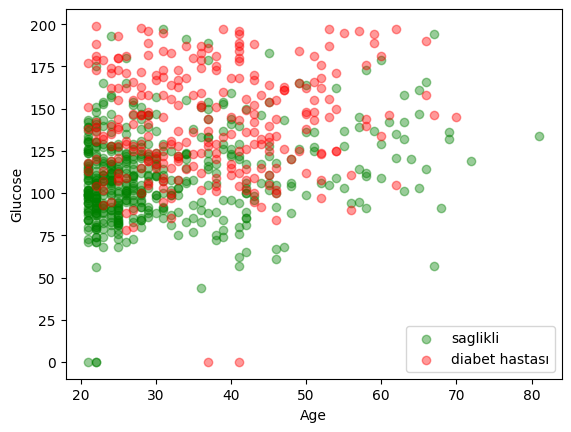

In [39]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]
#şimdiki sadece gLoucose'a bakaraak örnek bir çizim yapalım :
#programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,color="green",label="saglikli",alpha=0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="diabet hastası",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [40]:
# x ve y eksenleri beliryelim 
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis =1)
#Outcome sütununu (dependent variable) çıkarıp sadece independent variables bırakıyoruz
#çünkü KNN algoritmassı x değerli içerisinde gruplandırma yapacak.


#normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arassında olacak şekilde hepsini güncelliyoruz
#Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yabıtabiliriz.
x =(x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))
#önce 
print("Normalization öncesi ham veriler : \n")
print(x_ham_veri.head())
#sonra 
print("\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler :\n")
print(x.head())

Normalization öncesi ham veriler : 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler :

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [41]:
#train datamız ile test datamızı ayırıyoruz
#train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak 
#test datamız ile bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
#test etmek içim kullanılacak.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#knn modelimizi oluşturuyoruz.
knn=KNeighborsClassifier(n_neighbors = 3)#n_neigbors =k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu ",knn.score(x_test,y_test))


#k kaç olmalı ?
#en iyi değerini belirleyelim.
sayac = 1
for k in range(1,11):
  knn_yeni = KNeighborsClassifier(n_neighbors = k)
  knn_yeni.fit(x_train,y_train)
  print(sayac,"  ","Doğruluk oranı : ½ ",knn_yeni.score(x_test,y_test)*100)
  sayac += 1 


K=3 için test verilerimizin doğrulama testi sonucu  0.7857142857142857
1    Doğruluk oranı : ½  69.48051948051948
2    Doğruluk oranı : ½  74.02597402597402
3    Doğruluk oranı : ½  78.57142857142857
4    Doğruluk oranı : ½  75.97402597402598
5    Doğruluk oranı : ½  79.87012987012987
6    Doğruluk oranı : ½  79.22077922077922
7    Doğruluk oranı : ½  81.16883116883116
8    Doğruluk oranı : ½  79.22077922077922
9    Doğruluk oranı : ½  78.57142857142857
10    Doğruluk oranı : ½  79.22077922077922


In [42]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1